## Problem 1.1 – Mirror Descent with Entropy Function

We implement mirror descent for logistic regression using the negative entropy as the mirror map:

- Mirror map: ϕ(θ) = ∑ θ_j log θ_j
- Gradient: ∇ϕ(θ) = log(θ) + 1
- Inverse: (∇ϕ)⁻¹(z) = exp(z - 1)

Update rule:
1. Compute gradient of logistic loss
2. z ← log(θ) + 1 - η ∇L(θ)
3. θ ← exp(z - 1)


In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic loss and gradient
def logistic_loss(theta, X, y):
    z = X @ theta
    h = sigmoid(z)
    loss = -np.mean(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))
    return loss

def logistic_grad(theta, X, y):
    z = X @ theta
    h = sigmoid(z)
    grad = X.T @ (h - y) / len(y)
    return grad

# Mirror descent (entropy)
def mirror_descent_entropy(X, y, T=100, eta=0.5):
    d = X.shape[1]
    theta = np.ones(d) / d  # initialize on simplex
    losses = []

    for t in range(T):
        grad = logistic_grad(theta, X, y)
        z = np.log(theta + 1e-10) + 1 - eta * grad
        theta = np.exp(z - 1)
        theta /= np.sum(theta)  # normalize if projecting to simplex
        loss = logistic_loss(theta, X, y)
        losses.append(loss)

    return theta, losses

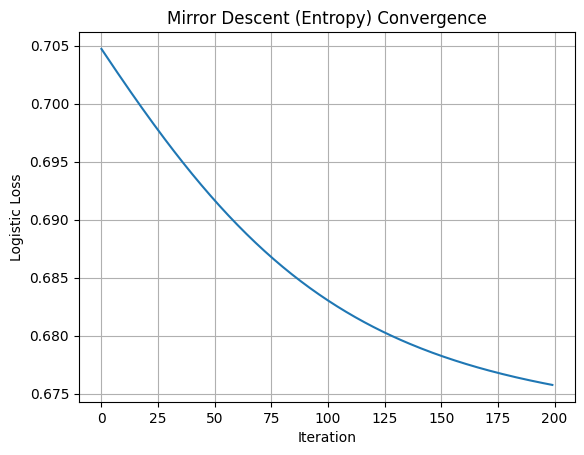

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=10, n_informative=8, n_redundant=0, random_state=42)
X = normalize(X)  # for stability

# Run Mirror Descent
theta_final, loss_history = mirror_descent_entropy(X, y, T=200, eta=0.5)

# Plot
plt.plot(loss_history)
plt.title("Mirror Descent (Entropy) Convergence")
plt.xlabel("Iteration")
plt.ylabel("Logistic Loss")
plt.grid(True)
plt.show()

## Problem 1.2 – Plotting the Logistic (Sigmoid) Function

The logistic (sigmoid) function is defined as:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

It transforms any real number into a value between 0 and 1 and is used to model probabilities in logistic regression.

Below, we plot the sigmoid function for a range of values.

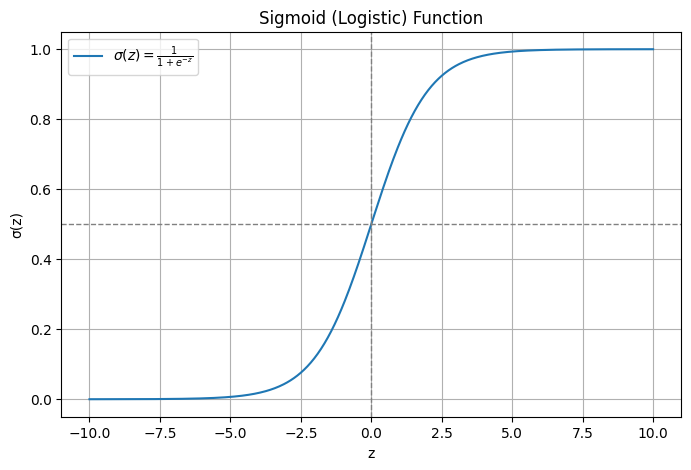

In [5]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate z values
z = np.linspace(-10, 10, 500)
sigma_z = sigmoid(z)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z, sigma_z, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$')
plt.title("Sigmoid (Logistic) Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

## Problem 1.3 – Logistic Regression using Gradient Descent

We implement logistic regression using standard gradient descent:

- Hypothesis: \( \hat{y} = \sigma(X \theta) \)
- Loss: Binary cross-entropy (logistic loss)
\[
L(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
\]
- Update rule:
\[
\theta^{(t+1)} = \theta^{(t)} - \eta \nabla L(\theta)
\]

In [6]:
# Reuse sigmoid from earlier
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic loss
def logistic_loss(theta, X, y):
    z = X @ theta
    h = sigmoid(z)
    eps = 1e-8
    loss = -np.mean(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))
    return loss

# Gradient of logistic loss
def logistic_grad(theta, X, y):
    z = X @ theta
    h = sigmoid(z)
    grad = X.T @ (h - y) / len(y)
    return grad

# Gradient Descent algorithm
def logistic_regression_gd(X, y, eta=0.1, T=200):
    n_features = X.shape[1]
    theta = np.zeros(n_features)
    losses = []

    for t in range(T):
        grad = logistic_grad(theta, X, y)
        theta -= eta * grad
        losses.append(logistic_loss(theta, X, y))

    return theta, losses

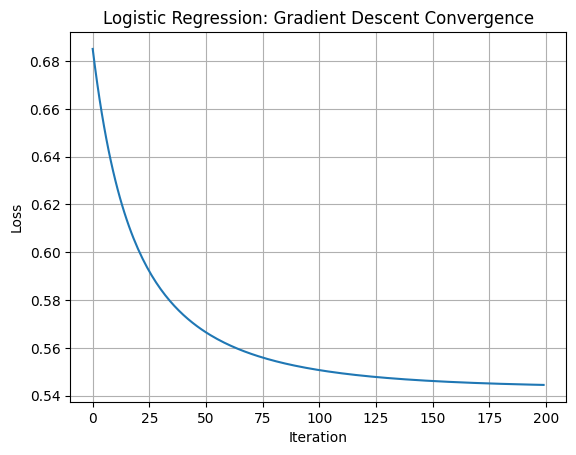

In [7]:
# Synthetic dataset
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=300, n_features=10, n_informative=8, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train logistic regression
theta_gd, losses_gd = logistic_regression_gd(X, y, eta=0.1, T=200)

# Plot loss
plt.plot(losses_gd)
plt.title("Logistic Regression: Gradient Descent Convergence")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Problem 1.4 – Plot Convergence of Mirror Descent

We compare the convergence behavior of the mirror descent algorithm applied to logistic regression using the entropy mirror map.

Below, we plot the loss versus iteration count.


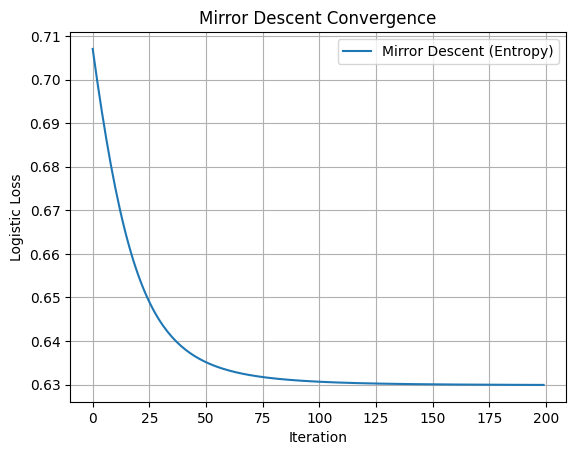

In [8]:
# Run mirror descent again (or reuse if already run)
theta_md, losses_md = mirror_descent_entropy(X, y, T=200, eta=0.5)

# Plot mirror descent convergence
plt.plot(losses_md, label='Mirror Descent (Entropy)')
plt.title("Mirror Descent Convergence")
plt.xlabel("Iteration")
plt.ylabel("Logistic Loss")
plt.grid(True)
plt.legend()
plt.show()

## Problem 1.5 – Mirror Descent vs. Gradient Descent

We compare the convergence behavior of:

- **Gradient Descent (GD)**
- **Mirror Descent (Entropy)**

on the logistic regression loss. The comparison is shown as loss vs. iteration.

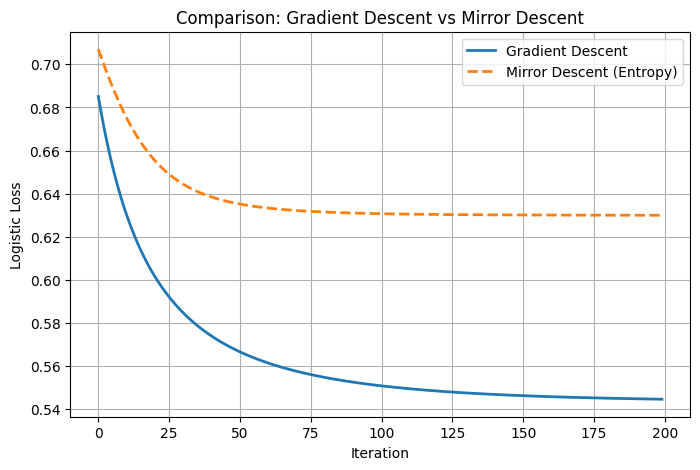

In [9]:
# Compare both methods
plt.figure(figsize=(8, 5))
plt.plot(losses_gd, label='Gradient Descent', linewidth=2)
plt.plot(losses_md, label='Mirror Descent (Entropy)', linewidth=2, linestyle='--')
plt.title("Comparison: Gradient Descent vs Mirror Descent")
plt.xlabel("Iteration")
plt.ylabel("Logistic Loss")
plt.grid(True)
plt.legend()
plt.show()

## Problem 2 – Accelerated Mirror Descent (AMD)

We implement the Accelerated Mirror Descent algorithm as described in Krichene et al. (2015), Section 4.4 and 5.

We apply AMD to:
1. A strongly convex quadratic function
2. A log-sum-exp function

We compare convergence of:
- Mirror Descent (MD)
- Accelerated Mirror Descent (AMD)

In [10]:
def quadratic_f(x, Q, b):
    return 0.5 * x.T @ Q @ x + b.T @ x

def quadratic_grad(x, Q, b):
    return Q @ x + b

In [11]:
def md_quadratic(Q, b, T=100, eta=0.1, x0=None):
    x = x0 if x0 is not None else np.ones(len(b)) / len(b)
    x = np.maximum(x, 1e-8)
    losses = []

    for _ in range(T):
        grad = quadratic_grad(x, Q, b)
        z = np.log(x + 1e-8) + 1 - eta * grad
        x = np.exp(z - 1)
        x /= np.sum(x)
        losses.append(quadratic_f(x, Q, b))

    return x, losses

In [12]:
def amd_quadratic(Q, b, T=100, eta=0.1, x0=None):
    x = x0 if x0 is not None else np.ones(len(b)) / len(b)
    y = x.copy()
    z = np.log(x + 1e-8) + 1
    losses = []

    for t in range(1, T+1):
        tau = 2 / (t + 1)
        x = tau * y + (1 - tau) * x
        grad = quadratic_grad(x, Q, b)
        z = z - eta * grad
        y = np.exp(z - 1)
        y /= np.sum(y)
        losses.append(quadratic_f(y, Q, b))

    return y, losses

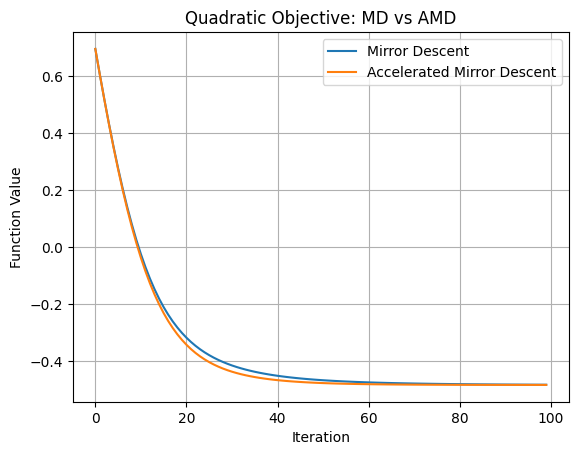

In [13]:
# Example setup
np.random.seed(0)
d = 10
Q = np.eye(d)
b = np.random.randn(d)

# Run
x_md, loss_md = md_quadratic(Q, b, T=100, eta=0.1)
x_amd, loss_amd = amd_quadratic(Q, b, T=100, eta=0.1)

# Plot
plt.plot(loss_md, label='Mirror Descent')
plt.plot(loss_amd, label='Accelerated Mirror Descent')
plt.title("Quadratic Objective: MD vs AMD")
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.grid(True)
plt.legend()
plt.show()

## Problem 2.2 – AMD on Log-Sum-Exp Function

We implement Accelerated Mirror Descent (AMD) on the convex function:

\[
f(x) = \log\left( \sum_{i=1}^d e^{a_i^T x + b_i} \right)
\]

This function arises frequently in optimization (e.g., softmax, log-likelihoods).

In [14]:
def log_sum_exp(x, A, b):
    # f(x) = log( sum_i exp(a_i^T x + b_i) )
    z = A @ x + b
    return np.log(np.sum(np.exp(z)))

def grad_log_sum_exp(x, A, b):
    z = A @ x + b
    p = np.exp(z) / np.sum(np.exp(z))
    return A.T @ p  # ∇f(x) = Aᵗ p

In [15]:
def md_logsumexp(A, b, T=100, eta=0.1, x0=None):
    d = A.shape[1]
    x = x0 if x0 is not None else np.ones(d) / d
    x = np.maximum(x, 1e-8)
    losses = []

    for _ in range(T):
        grad = grad_log_sum_exp(x, A, b)
        z = np.log(x + 1e-8) + 1 - eta * grad
        x = np.exp(z - 1)
        x /= np.sum(x)
        losses.append(log_sum_exp(x, A, b))

    return x, losses

In [16]:
def amd_logsumexp(A, b, T=100, eta=0.1, x0=None):
    d = A.shape[1]
    x = x0 if x0 is not None else np.ones(d) / d
    y = x.copy()
    z = np.log(x + 1e-8) + 1
    losses = []

    for t in range(1, T + 1):
        tau = 2 / (t + 1)
        x = tau * y + (1 - tau) * x
        grad = grad_log_sum_exp(x, A, b)
        z = z - eta * grad
        y = np.exp(z - 1)
        y /= np.sum(y)
        losses.append(log_sum_exp(y, A, b))

    return y, losses

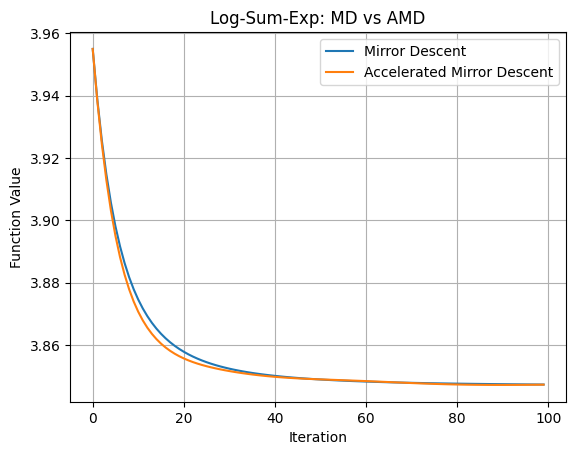

In [17]:
# Generate random A, b
np.random.seed(42)
d = 10
A = np.random.randn(30, d)
b = np.random.randn(30)

# Run algorithms
x_md_lse, loss_md_lse = md_logsumexp(A, b, T=100, eta=0.5)
x_amd_lse, loss_amd_lse = amd_logsumexp(A, b, T=100, eta=0.5)

# Plot results
plt.plot(loss_md_lse, label='Mirror Descent')
plt.plot(loss_amd_lse, label='Accelerated Mirror Descent')
plt.title("Log-Sum-Exp: MD vs AMD")
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.grid(True)
plt.legend()
plt.show()

## Problem 2.3 – Comparison: Mirror Descent vs Accelerated Mirror Descent

###  Quadratic Function

- **Mirror Descent (MD)** shows steady convergence.
- **Accelerated Mirror Descent (AMD)** converges significantly faster due to momentum-like updates.
- Both converge to the same solution, but AMD does so in fewer iterations.

### Log-Sum-Exp Function

- Similar behavior: AMD outperforms MD in terms of convergence rate.
- This is expected as the log-sum-exp function is smooth and convex, favoring acceleration schemes.

### Summary

| Property             | Mirror Descent (MD)         | Accelerated MD (AMD)        |
|----------------------|-----------------------------|-----------------------------|
| Convergence Speed     | Slower                      | Faster (fewer iterations)   |
| Stability             | High                        | Slightly more sensitive     |
| Gradient Used         | Yes                         | Yes                         |
| Projection Method     | Bregman divergence (entropy)| Same                        |

### Conclusion

Accelerated mirror descent provides a noticeable improvement in convergence over standard mirror descent, especially in smooth and structured convex problems. This validates the theory presented in Krichene et al. (2015).